Newton2とか言っておきながらやることは割線法と二分法

## 割線法
$f'(x)$を数値的に近似したNewton法

導関数が定義できない時などに使う。
逐一、$f'(x) \simeq \frac{f(x_n) - f(x_{n - 1})}{x_n - x_{n - 1}}$を計算して微分係数の近似値を出す

In [15]:
import sympy as sym

from sympy.plotting import plot
sym.init_printing(use_unicode = True)
%matplotlib inline

import numpy as np
import sympy
import math


n = np.arange(0, 14, 1)
f_i = np.zeros(14)

x = sym.Symbol('x')
f = sym.Function('f')

f = x ** 3 - 2 * x - 5

x_n0 = 19.8
x_n1 = 20.2
delta = 10 ** (-6)

i = 0
# 誤差の対数を格納していく
f_i[i] = math.log(f.subs(x, x_n1))
print("(n, x, f(x)) = (", end = "")
print(n[i], end = ", ")
print(x_n1, end = ", ")
print(f.subs(x, x_n1), end = ")\n")


while abs(f.subs(x, x_n1)) >= delta :
    i += 1
    
    # ここが違う！
    # 微分係数を近似的に求める
    df = (f.subs(x, x_n1) - f.subs(x, x_n0)) / (x_n1 - x_n0)
    
    x_n0 = x_n1
    x_n1 = x_n1 - f.subs(x, x_n1) / df
    f_i[i] = math.log(f.subs(x, x_n1))
    
    print("(n, x, f(x)) = (", end = "")
    print(n[i], end = ", ")
    print(x_n1, end = ", ")
    print(f.subs(x, x_n1), end = ")\n")

(n, x, f(x)) = (0, 20.2, 8197.00800000000)
(n, x, f(x)) = (1, 13.3579847083570, 2351.82612355830)
(n, x, f(x)) = (2, 10.6050797276711, 1166.51893583464)
(n, x, f(x)) = (3, 7.89581092226477, 471.463472954014)
(n, x, f(x)) = (4, 6.05808523218956, 205.217960681095)
(n, x, f(x)) = (5, 4.64159443319385, 85.7171730520001)
(n, x, f(x)) = (6, 3.62555437728279, 35.4055148048087)
(n, x, f(x)) = (7, 2.91054273793087, 13.8348759730630)
(n, x, f(x)) = (8, 2.45195189938917, 4.83739803975628)
(n, x, f(x)) = (9, 2.20539542658030, 1.31574302799432)
(n, x, f(x)) = (10, 2.11327823763883, 0.211227712838544)
(n, x, f(x)) = (11, 2.09566172941461, 0.0123997094047787)
(n, x, f(x)) = (12, 2.09456309351356, 0.000129607141024835)
(n, x, f(x)) = (13, 2.09455148879706, 8.09732334516866e-8)


誤差は1.6次収束する

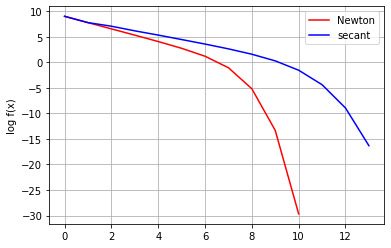

In [17]:
import matplotlib.pyplot as plt

# 前回、Newton法の誤差についてグラフを描いた。
# その時の値をコピペ
newton = np.array([ 8.98155594, 7.76335135, 6.54224835, 5.31307458, 4.06035177, 2.73570739, 1.18403177, -1.06778652,
                               -5.18040965, -13.34877127, -29.68452064 ])

plt.grid()
plt.ylabel("log f(x)")
plt.plot(np.arange(0, 11, 1), newton, 'r')
plt.plot(n, f_i, 'b')
plt.legend(["Newton", "secant"])
plt.show()

割線法(secant method)の収束が、Newton法よりも遅いことが確認できる。